In [2]:
%matplotlib inline

import datetime
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests

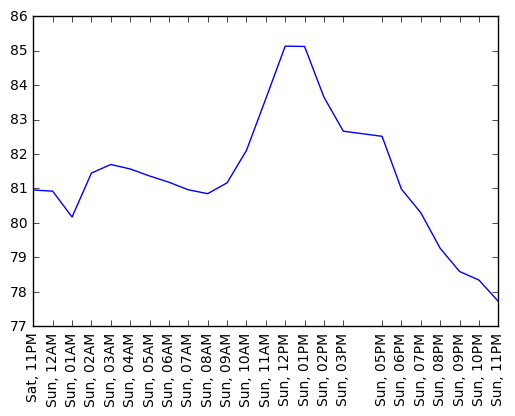

In [169]:
r = requests.get('http://influx.dedovic.com:8086/query?q=select+mean(value)+from+temperature+where+time+%3E+now()+-+1d+group+by+time(1h)&db=readings')


data = r.json()['results'][0]['series'][0]['values']

data = filter(lambda x: x[1] is not None, data)
data = map(lambda x: list([datetime.datetime.strptime(x[0], '%Y-%m-%dT%H:%M:%SZ'), x[1]]), data)
data = list(data)

y = [p[1] * 1.8 + 32 for p in data]
x = [p[0] - datetime.timedelta(hours=5) for p in data]

ticks = [x.strftime('%a, %I%p') for x in x]

plt.plot(x, y)
plt.xticks(x, ticks, rotation='vertical')
plt.show()